**Indicators of High Traffic on I-94(westbound)**

This notebook explores hourly traffic volume on the I-94 corridor (Minneapolis–St. Paul) to find time- and weather-related indicators of heavy traffic.

Summary: Daytime traffic on I-94 is driven primarily by calendar/time effects, weekday and rush-hour cycles, simple weather metrics add little signal. Business-day peaks reach ~6.2k cars/h vs weekend midday ~4.3k.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
metro = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [35]:
import pandas as pd
i94 = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [36]:
i94.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [37]:
i94.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [38]:
i94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


<Axes: title={'center': 'Traffic Volume - All Hours'}, xlabel='Cars per hour', ylabel='Frequency'>

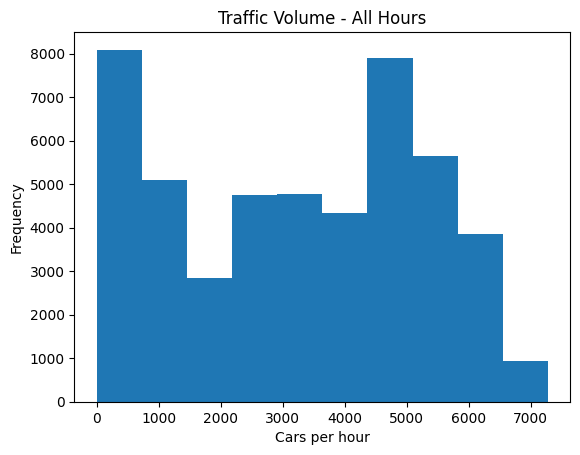

In [39]:
i94["traffic_volume"].plot.hist(title="Traffic Volume - All Hours", xlabel = "Cars per hour", ylabel="Frequency")

Most hours cluster below ~5,000 cars/h, with a long right tail up to ~7,300. 
Zeros likely represent outages or closures rather than true traffic

In [40]:
i94["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The standard deviation is large. The 25th percentile is 1,193 cars/hour—consistent with overnight lows, while the median is 3,380 cars/hour (about 2× the 25th percentile).


We can now analyze if daytime and nighttime influences traffic volume.

We divide hours into daytime (07:00–19:00) and nighttime (19:00–07:00).

In [41]:
i94['date_time'] = pd.to_datetime(i94['date_time'])

In [42]:
day = i94.copy()[(i94['date_time'].dt.hour >= 7) & (i94['date_time'].dt.hour < 19)]
night = i94.copy()[(i94['date_time'].dt.hour >= 19) | (i94['date_time'].dt.hour < 7)]


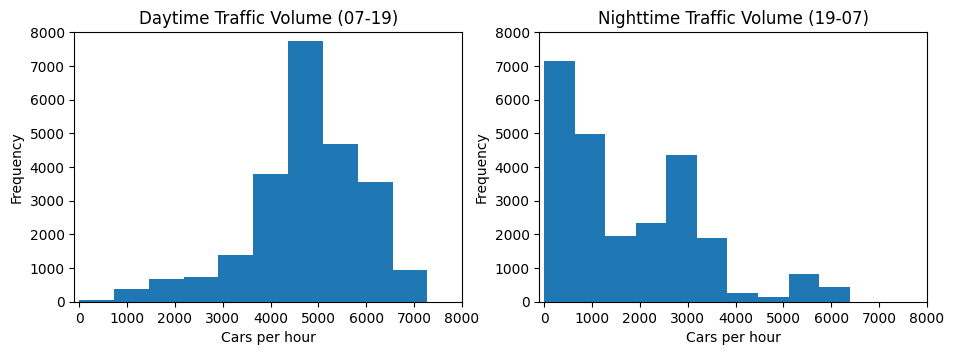

In [43]:
plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
plt.hist(day["traffic_volume"])
plt.title("Daytime Traffic Volume (07-19)")
plt.ylim(0,8000)
plt.xlim(-100, 8000)
plt.ylabel('Frequency')
plt.xlabel("Cars per hour")

plt.subplot(1,2,2)
plt.hist(night["traffic_volume"])
plt.title("Nighttime Traffic Volume (19-07)")
plt.ylim(0,8000)
plt.xlim(-100, 8000)
plt.ylabel('Frequency')
plt.xlabel("Cars per hour")

plt.show()



In [44]:
day["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [45]:
night["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Daytime appears slightly left-skewed (many observations at higher volumes): the 75th percentile is 5,559 cars/hour. Nighttime is right-skewed: the 75th percentile is 2,819 cars/hour.

Traffic seems to be lighter at night, so we can discard it and only focus on day traffic when finding indicators of heavy traffic

Now lets see if time is a big indicator of heavy traffic, lets look at month, day of the week, time of day

In [46]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean(numeric_only=True)
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

(1.0, 13.0)

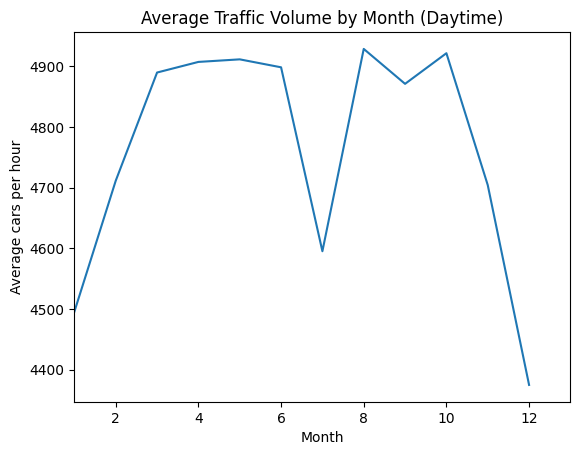

In [47]:
plt.plot(by_month["traffic_volume"])
plt.title("Average Traffic Volume by Month (Daytime)")
plt.xlabel("Month")
plt.ylabel("Average cars per hour")
plt.xlim(1, 13)  


Traffic rises from January to spring, dips in July, rebounds through October, then declines toward December.

Less traffic volume on January, December, and July (reasons could be summer travelling, holidays, cold weather and also hot weather).

Let's see if the pattern of July continues in other years

<Axes: title={'center': 'July Daytime Traffic by Year'}, xlabel='Year', ylabel='Average cars per hour'>

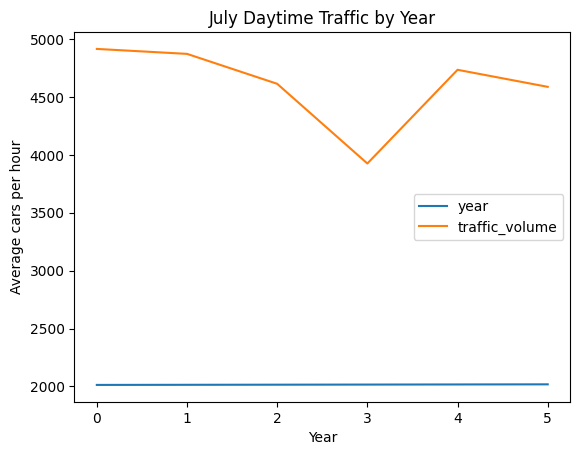

In [48]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year', as_index=False)['traffic_volume'].mean().plot.line(title="July Daytime Traffic by Year", xlabel="Year", ylabel="Average cars per hour")


July is generally high except in 2016, suggesting a localized factor (e.g., construction). So we can now indicate that traffic volume in warmer seasons are normally higher than cooler seasons from November to Feburary.

Now move on to days of the week

<Axes: title={'center': 'Average Daytime Traffic by Weekday'}, xlabel='Day of Week (0-6 = mon-sun)', ylabel='Average cars per hour'>

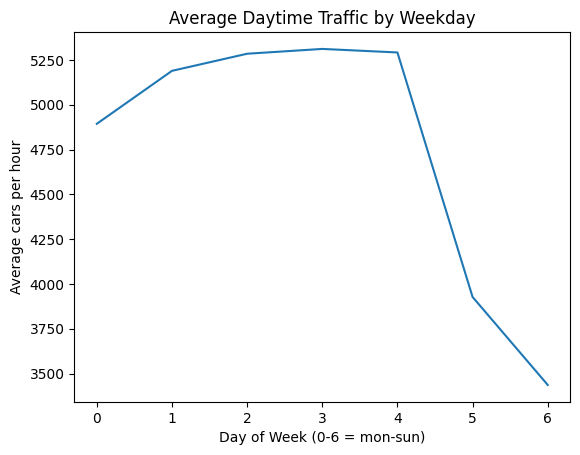

In [49]:
day["dayofweek"] = day["date_time"].dt.dayofweek
by_dayofweek = day.groupby("dayofweek").mean(numeric_only=True)
by_dayofweek["traffic_volume"].plot.line(title="Average Daytime Traffic by Weekday", xlabel= "Day of Week (0-6 = mon-sun)", ylabel ="Average cars per hour")

Traffic volume decreases as weekend approaches, from thursday to saturday. Traffic volume is steady at its peak on business days Monday to Thursday.

Mon- Thu average => 4.9 - 5.1k vs. Fri-Sun average => 4.1-4.4k

Time of Day Analysis

In [50]:
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = business_days.groupby('hour').mean(numeric_only=True)
by_hour_weekend = weekend.groupby('hour').mean(numeric_only=True)

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


(6.0, 20.0)

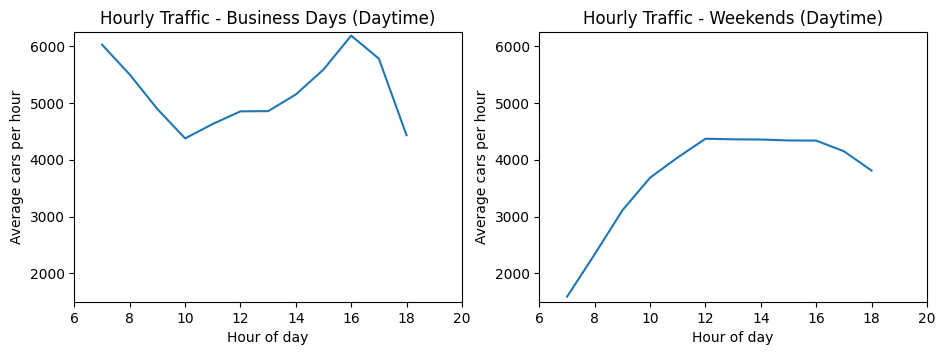

In [57]:
plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
plt.plot(by_hour_business["traffic_volume"])
plt.title("Hourly Traffic - Business Days (Daytime)")
plt.xlabel("Hour of day")
plt.ylabel("Average cars per hour")
plt.ylim(1500,6250)
plt.xlim(6, 20)

plt.subplot(1,2,2)
plt.plot(by_hour_weekend["traffic_volume"])
plt.title("Hourly Traffic - Weekends (Daytime)")
plt.xlabel("Hour of day")
plt.ylabel("Average cars per hour")
plt.ylim(1500,6250)
plt.xlim(6, 20)

Clear AM (07:00) and PM (16:00–17:00) peaks on business days (max ≈ 6,190); weekends plateau midday around ~4,300


This is strong evidence that business days drive heavier traffic, with most commuters starting and finishing work around the same hours.

summary of time indicators for heavy traffic.
- Month: Higher volumes in warmer months (Mar–Oct) at ~5,000 cars/hour on average, versus cooler months (< 4,000 cars/hour)
- Day of week: Business days consistently exceed weekends
- Hour of day: rush hour peaks around 7:00 and 16:00-17:00.


Let's now look at weather indicators

In [52]:
new_day = day.copy().select_dtypes(include=['float', 'integer'])
new_day.corr()["traffic_volume"]

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

We see the temperature has the strongest correlation with traffic volume

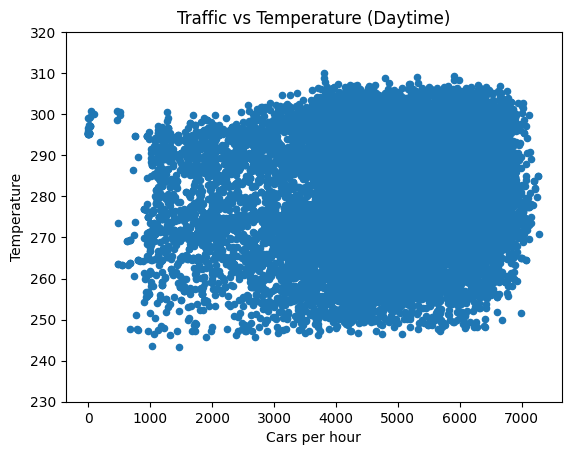

In [58]:
day.plot.scatter("traffic_volume","temp")
plt.ylim(230, 320)
plt.title("Traffic vs Temperature (Daytime)")
plt.xlabel("Cars per hour")
plt.ylabel("Temperature")
plt.show()

No visible pattern: simple correlation is weak compared to calendar/time effects

now we'll look at the categorical weather-related columns

<Axes: title={'center': 'Average Daytime Traffic by Weather'}, xlabel='Average cars per hour', ylabel='weather_main'>

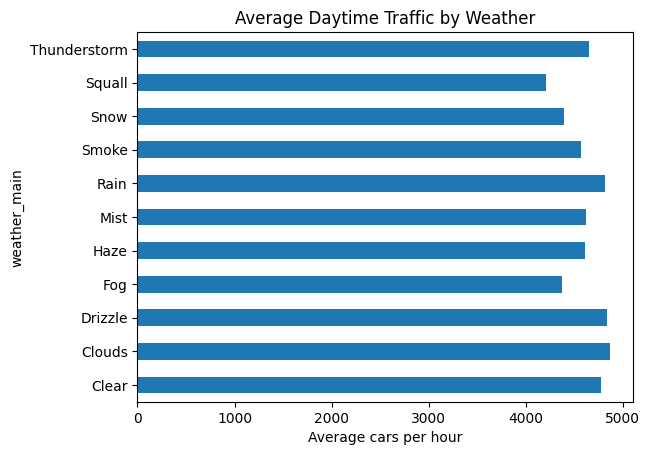

In [59]:
by_weather_main = day.groupby('weather_main').mean(numeric_only=True)
by_weather_main['traffic_volume'].plot.barh(title="Average Daytime Traffic by Weather", xlabel="Average cars per hour", ylabel="weather_main")

no strong indicator of traffic for all categories, differences may reflect sample size rather than true effects

<Axes: ylabel='weather_description'>

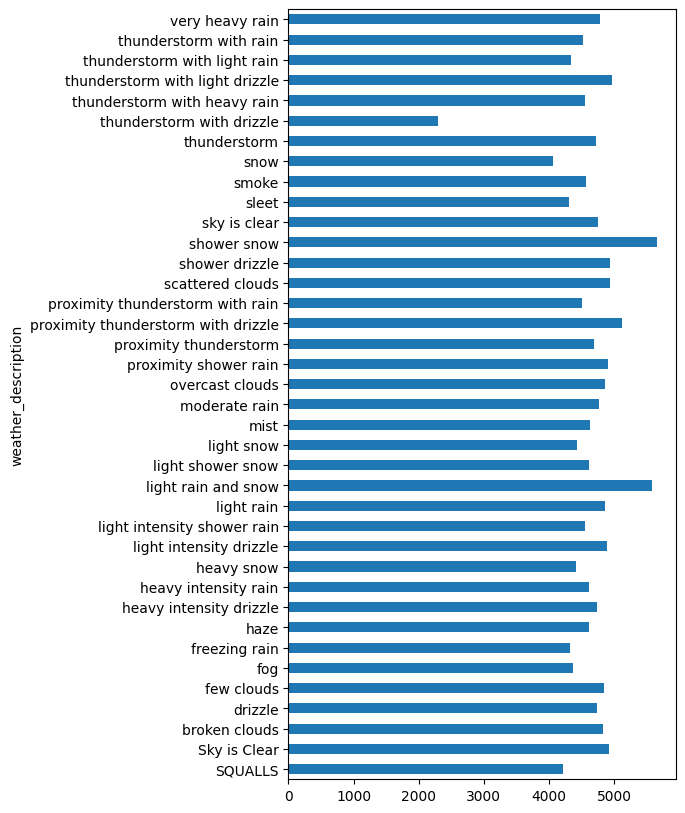

In [55]:
by_weather_description = day.groupby('weather_description').mean(numeric_only=True)
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10), title="Average Daytime Traffic by Weather Description", xlabel="average cars per hour", ylabel="weather_description")

‘shower snow’ and ‘light rain and snow’ categories show the highest averages

**CONCLUSION**
- Weather: no strong indicators
- Season: warmer months (Mar–Oct) generally higher traffic than cooler months (Nov–Feb)
- Calendar time: business-day rush hours (∼07:00 and 16:00–17:00) exceed weekend levels

Daytime traffic (07:00–19:00) shows the strongest signals from calendar time: business-day rush hours (≈07:00 and 16:00–17:00) are markedly higher than weekend hours, weekday averages exceed weekend averages, monthly averages rise from winter into spring/summer, dip in July, and decline into late fall. 
Simple correlations confirm that weekday and hour dominate temperature as indicators. Weather category means are broadly similar and should be interpreted with their sample sizes in mind. Results are specific to a single westbound station and are sensitive to zero-volume anomalies, so we report daytime-only conclusions and treat July’s dip as a hypothesis rather than a verified causal effect